#Export audio with LLM
Made by: Wilfredo Aaron Sosa Ramos

In [1]:
!pip install -q langchain langchain_core langchain_community langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.0 MB/s eta 0:00:00


##1. With other dependencies:

In [2]:
from google.colab import userdata
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = userdata.get(var)


_set_env("GOOGLE_API_KEY")

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import (
       AIMessage,
       HumanMessage,
       SystemMessage
  )

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp", temperature=0.7)

In [5]:
!pip install -q gtts

In [7]:
from gtts import gTTS
from IPython.display import Audio

def generate_answer(question, lang):
    messages = [
        SystemMessage(content="You are an expert in answering question about any kind of topic."),
        HumanMessage(content=f"""Here is the question: {question}
        Answer in this language: {lang}
        """)
    ]

    result = llm.invoke(messages)
    speech = gTTS(text=result.content, lang=lang, slow=False)
    speech.save("output.mp3")
    print("Audio file generated: output.mp3")
    return Audio("output.mp3", autoplay=True)

In [9]:
generate_answer("¿Qué es un LLM?", "es")

Audio file generated: output.mp3


In [10]:
generate_answer("¿Qué es una Ecuación Diferencial?", "es")

Audio file generated: output.mp3


##With Google Gemini:

In [11]:
!pip install -q google-genai

In [12]:
_set_env("GEMINI_API_KEY")

In [13]:
import google.generativeai as genai

myfile = genai.upload_file("/content/output.mp3")
print(f"{myfile=}")

model = genai.GenerativeModel("gemini-1.5-flash")
result = model.generate_content([myfile, "Give me the full transcript of this audio"])
print(f"{result.text=}")

myfile=genai.File({
    'name': 'files/dycfzel49453',
    'display_name': 'output.mp3',
    'mime_type': 'audio/mpeg',
    'sha256_hash': 'MmEzMDkwZjE5Y2M2MzRkY2ZiOTk2ZGYzMzI0NmU1MjNjOGZlOWM5ZDk3MWMwMjVmYTQxMmQ1Y2VlOWQzMjc1YQ==',
    'size_bytes': '1091904',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/dycfzel49453',
    'create_time': '2025-01-21T18:29:41.570624Z',
    'expiration_time': '2025-01-23T18:29:41.567705073Z',
    'update_time': '2025-01-21T18:29:41.570624Z'})
result.text='Una ecuación diferencial es una ecuación matemática que relaciona una función con sus derivadas. En otras palabras, describe cómo cambia una función en relación con sus variables. Estas ecuaciones son fundamentales para modelar fenómenos en diversos campos como la física, la ingeniería, la biología y la economía. Existen diferentes tipos de ecuaciones diferenciales, como: ecuaciones diferenciales ordinarias, EDO ** involucran funciones de una sola variable y su

In [15]:
result.text

'Una ecuación diferencial es una ecuación matemática que relaciona una función con sus derivadas. En otras palabras, describe cómo cambia una función en relación con sus variables. Estas ecuaciones son fundamentales para modelar fenómenos en diversos campos como la física, la ingeniería, la biología y la economía. Existen diferentes tipos de ecuaciones diferenciales, como: ecuaciones diferenciales ordinarias, EDO ** involucran funciones de una sola variable y sus derivadas con respecto a esa variable. Ecuaciones diferenciales parciales, EDP ** involucran funciones de varias variables y sus derivadas parciales con respecto a esas variables. Las ecuaciones diferenciales se utilizan para describir una amplia gama de fenómenos, tales como: movimiento de objetos ** la segunda ley de Newton se expresa como una ecuación diferencial que relaciona la fuerza aplicada a un objeto con su aceleración. Crecimiento poblacional ** los modelos de crecimiento poblacional, como el modelo logístico, se ba

In [17]:
import google.generativeai as genai

myfile = genai.upload_file("/content/poem.txt")
print(f"{myfile=}")

model = genai.GenerativeModel("gemini-1.5-flash")
result = model.generate_content(
    [myfile, "\n\n", "Can you add a few more lines to this poem? Respect the languagw"]
)
print(f"{result.text=}")

myfile=genai.File({
    'name': 'files/8uqh6ugp2woz',
    'display_name': 'poem.txt',
    'mime_type': 'text/plain',
    'sha256_hash': 'NGU4YjY4YzY5MmYwMWI0NTc0MTk5NWJjYTRhYWM2YzZlOTQ5YzNhNWQ2ZTNhMGNjN2Y4YmU0YzczMzg2YTVjMw==',
    'size_bytes': '845',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/8uqh6ugp2woz',
    'create_time': '2025-01-21T18:37:02.717447Z',
    'expiration_time': '2025-01-23T18:37:02.673903738Z',
    'update_time': '2025-01-21T18:37:02.717447Z'})
result.text='Hay golpes en la vida, tan fuertes... ¡Yo no sé!\nGolpes como del odio de Dios; como si ante ellos,\nla resaca de todo lo sufrido\nse empozara en el alma... ¡Yo no sé!\n\nSon pocos; pero son... Abren zanjas oscuras\nen el rostro más fiero y en el lomo más fuerte.\nSerán tal vez los potros de bárbaros atilas;\no los heraldos negros que nos manda la Muerte.\n\nSon las caídas hondas de los Cristos del alma,\nde alguna fe adorable que el Destino blasfema.\nEsos golpes sa

In [18]:
print(result.text)

Hay golpes en la vida, tan fuertes... ¡Yo no sé!
Golpes como del odio de Dios; como si ante ellos,
la resaca de todo lo sufrido
se empozara en el alma... ¡Yo no sé!

Son pocos; pero son... Abren zanjas oscuras
en el rostro más fiero y en el lomo más fuerte.
Serán tal vez los potros de bárbaros atilas;
o los heraldos negros que nos manda la Muerte.

Son las caídas hondas de los Cristos del alma,
de alguna fe adorable que el Destino blasfema.
Esos golpes sangrientos son las crepitaciones
de algún pan que en la puerta del horno se nos quema.

Y el hombre... ¡Pobre... pobre! Vuelve los ojos, como
cuando por sobre el hombro nos llama una palmada;
vuelve los ojos locos, y todo lo vivido
se empoza, como un charco de culpa, en la mirada.

Hay golpes en la vida, tan fuertes... ¡Yo no sé!
Mas callan, y el silencio es su más cruel latido.
Y el alma, herida y sola, en la oscuridad se esconde,
buscando un eco débil que le diga que no está sola.
Y en la noche profunda, un susurro de esperanza,
que a

In [19]:
import google.generativeai as genai

myfile = genai.upload_file("/content/transformers.png")
print(f"{myfile=}")

model = genai.GenerativeModel("gemini-1.5-flash")
result = model.generate_content(
  [myfile, "\n\n", "¿Cuáles son las buenas prácticas de lo que ves en la imagen?"]
)
print(f"{result.text=}")

myfile=genai.File({
    'name': 'files/ybtpeotuhzlo',
    'display_name': 'transformers.png',
    'mime_type': 'image/png',
    'sha256_hash': 'ZTJmNGVhZmMwNmYzMDQzNzMzZWNjYzA5ZDA4ODUwMjRhMTBjNGNmYmI0YjAwYmExNWFmMWM2ZmM1ZjMyMDgzOA==',
    'size_bytes': '205091',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/ybtpeotuhzlo',
    'create_time': '2025-01-21T18:39:21.584887Z',
    'expiration_time': '2025-01-23T18:39:21.554410797Z',
    'update_time': '2025-01-21T18:39:21.584887Z'})
result.text='La imagen muestra las arquitecturas de los modelos de lenguaje BERT y GPT.  Las buenas prácticas que se reflejan son:\n\n* **Uso de la atención multi-cabeza (Multi-Head Attention):**  Ambas arquitecturas utilizan la atención multi-cabeza, una técnica clave en los modelos de transformadores.  Esto permite al modelo procesar información de diferentes partes de la secuencia de entrada en paralelo y capturar relaciones complejas entre palabras. Es una buena prá

In [20]:
print(result.text)

La imagen muestra las arquitecturas de los modelos de lenguaje BERT y GPT.  Las buenas prácticas que se reflejan son:

* **Uso de la atención multi-cabeza (Multi-Head Attention):**  Ambas arquitecturas utilizan la atención multi-cabeza, una técnica clave en los modelos de transformadores.  Esto permite al modelo procesar información de diferentes partes de la secuencia de entrada en paralelo y capturar relaciones complejas entre palabras. Es una buena práctica porque permite un procesamiento más completo y rico de la información contextual.

* **Capas de Feed-Forward:** La inclusión de capas de *feed-forward* después de la atención multi-cabeza agrega no linealidad al modelo, permitiendo aprender representaciones más complejas y mejorando la capacidad del modelo para capturar patrones en los datos.  Es una buena práctica para aumentar la expresividad y capacidad de aprendizaje.

* **Normalización de capas (Add & Norm):**  La normalización de las capas (con "Add & Norm", probablemente u

In [21]:
import google.generativeai as genai

import time

# Video clip (CC BY 3.0) from https://peach.blender.org/download/
myfile = genai.upload_file("/content/llms.mp4")
print(f"{myfile=}")

# Videos need to be processed before you can use them.
while myfile.state.name == "PROCESSING":
    print("processing video...")
    time.sleep(5)
    myfile = genai.get_file(myfile.name)

model = genai.GenerativeModel("gemini-1.5-flash")
result = model.generate_content([myfile, "¿Cuáles son los puntos más importantes del vídeo?"])
print(f"{result.text=}")

myfile=genai.File({
    'name': 'files/t84fd0jtk6px',
    'display_name': 'llms.mp4',
    'mime_type': 'video/mp4',
    'sha256_hash': 'MDMxYzA2MjkxZDM5N2RhZmU4Yzc0MjQ3NThkYTAxZjEwMjE0Mzg3NzRkM2FkMzEzODc2OGNhNzY4MWNhY2U0NQ==',
    'size_bytes': '1216870',
    'state': 'PROCESSING',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/t84fd0jtk6px',
    'create_time': '2025-01-21T18:45:56.854812Z',
    'expiration_time': '2025-01-23T18:45:56.845506457Z',
    'update_time': '2025-01-21T18:45:56.854812Z'})
processing video...
result.text='Claro, aquí están los puntos más importantes del vídeo:\n\nEl vídeo trata sobre cómo ejecutar modelos de lenguaje grandes de forma local y gratuita mediante el uso de una herramienta llamada Ollama. Ollama es una herramienta revolucionaria que permite ejecutar modelos de lenguaje grandes de forma local, sin necesidad de conexión a internet.\n\nPara instalar Ollama, el presentador proporciona el siguiente comando para ejecutar en una termina

In [22]:
print(result.text)

Claro, aquí están los puntos más importantes del vídeo:

El vídeo trata sobre cómo ejecutar modelos de lenguaje grandes de forma local y gratuita mediante el uso de una herramienta llamada Ollama. Ollama es una herramienta revolucionaria que permite ejecutar modelos de lenguaje grandes de forma local, sin necesidad de conexión a internet.

Para instalar Ollama, el presentador proporciona el siguiente comando para ejecutar en una terminal Linux:

curl -fsSL https://ollama.com/install.sh | sh

Después de la instalación, el presentador indica el siguiente comando para ejecutar el modelo de lenguaje grande:

ollama run qwen-2.5:0.5b

El presentador afirma que el modelo tiene un tamaño de solo 397 MB.

Por último, el presentador afirma que al utilizar Ollama, los usuarios podrán ejecutar un modelo de IA de forma local similar a ChatGPT, sin necesidad de internet.


In [25]:
import google.generativeai as genai

model = genai.GenerativeModel("gemini-1.5-flash")
sample_pdf = genai.upload_file("/content/llms.pdf")
response = model.generate_content(["Resume este archivo PDF:", sample_pdf])
print(response.text)

Este documento trata sobre los modelos lingüísticos grandes (LLM) y los transformadores.  Los LLM y los transformadores han revolucionado el campo del procesamiento del lenguaje natural (NLP), permitiendo a los modelos comprender, generar y manipular el lenguaje humano con notable precisión.  Los transformadores, introducidos en el artículo "Attention Is All You Need", utilizan un mecanismo de autoatención que permite al modelo ponderar la importancia de las diferentes palabras en una oración independientemente de su distancia, lo que facilita la captura de dependencias a largo plazo en el texto.  Los componentes clave de los transformadores incluyen el codificador y el decodificador, el mecanismo de autoatención y la codificación posicional.

Los LLM se basan en la arquitectura del transformador y se entrenan en conjuntos de datos masivos para realizar una variedad de tareas lingüísticas, como generación de texto, resumen, traducción y respuesta a preguntas.  Ejemplos de LLM incluyen 

Image Generation: https://ai.google.dev/gemini-api/docs/imagen?hl=es-419

In [29]:
from google import genai as genaiclient
from google.genai import types

client = genaiclient.Client()

In [ ]:
response = client.models.generate_image(
    model='imagen-3.0-generate-002',
    prompt='Fuzzy bunnies in my kitchen',
    config=types.GenerateImageConfig(
        negative_prompt= 'people',
        number_of_images= 1,
        include_rai_reason= True,
        output_mime_type= 'image/jpeg'
    )
)

response.generated_images[0].image.show()

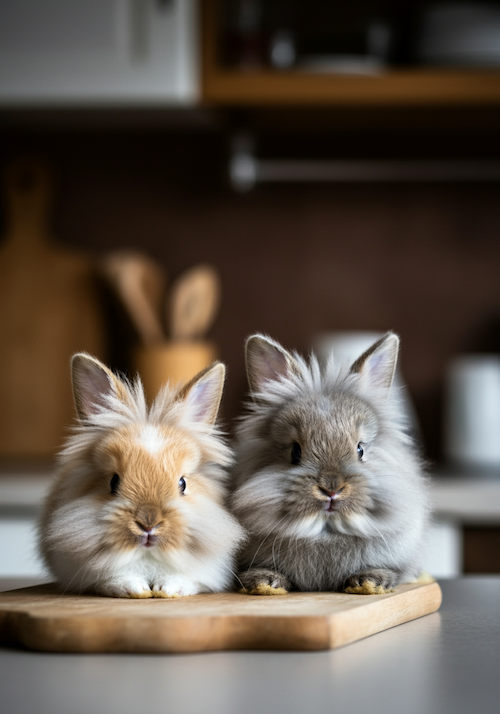